# Importing Dependencies

In [1]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

# Reading the Images

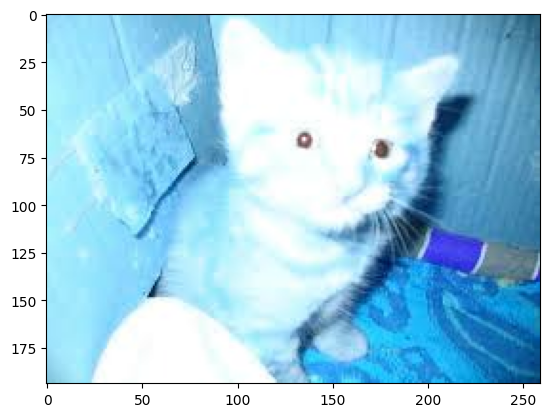

In [2]:
img_path = os.path.join('Datasets\HEDataset', 'sample02.jpeg')
img = cv2.imread(img_path)
plt.imshow(img)

#### Printing the dimensions

In [3]:
height, width, channels = img.shape
print(height,'x',width, 'x', channels)

194 x 259 x 3


# Converting to Grayscale and Plotting the Histogram

(194, 259)


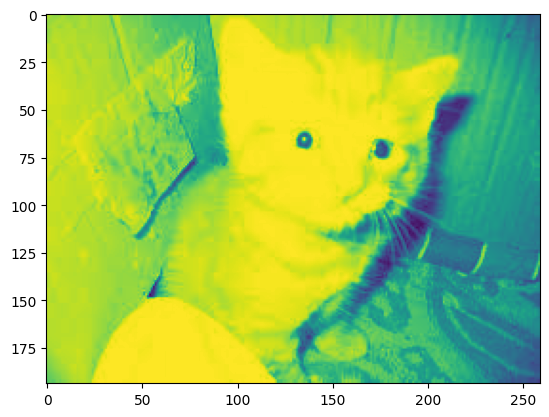

In [4]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray)
print(img_gray.shape)

Text(0, 0.5, 'Frequency')

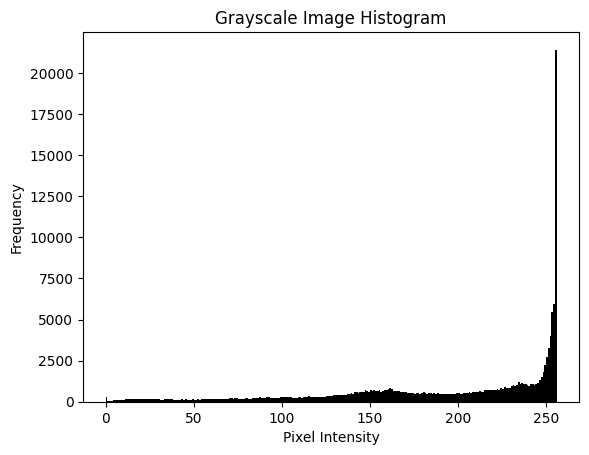

In [5]:
plt.hist(img.ravel(), bins=256, range=[0, 256], color='black')
plt.title('Grayscale Image Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

# Equalizing the Histogram for each channel

# Manual Coded

In [7]:
hist, bins = np.histogram(img_gray.flatten(), 256, [0, 256])

pk = []
for i in range(0,len(hist)):
    pk.append(hist[i]/(height*width))

sk = []
for i in range(0, len(pk)):
    sk.append((int)(255*(sum(pk[:i+1]))))

dict = {}
for i in range(0, 256):
    dict[i] = sk[i]
    
print(dict)

{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0, 21: 0, 22: 0, 23: 0, 24: 0, 25: 0, 26: 0, 27: 0, 28: 0, 29: 0, 30: 0, 31: 0, 32: 0, 33: 0, 34: 0, 35: 0, 36: 0, 37: 0, 38: 0, 39: 0, 40: 0, 41: 0, 42: 0, 43: 0, 44: 0, 45: 0, 46: 0, 47: 0, 48: 0, 49: 0, 50: 0, 51: 0, 52: 0, 53: 0, 54: 0, 55: 1, 56: 1, 57: 1, 58: 1, 59: 1, 60: 1, 61: 1, 62: 1, 63: 1, 64: 1, 65: 2, 66: 2, 67: 2, 68: 2, 69: 2, 70: 2, 71: 2, 72: 2, 73: 3, 74: 3, 75: 3, 76: 3, 77: 3, 78: 3, 79: 3, 80: 3, 81: 4, 82: 4, 83: 4, 84: 4, 85: 4, 86: 4, 87: 5, 88: 5, 89: 5, 90: 5, 91: 5, 92: 6, 93: 6, 94: 6, 95: 6, 96: 7, 97: 7, 98: 7, 99: 8, 100: 8, 101: 8, 102: 8, 103: 9, 104: 9, 105: 10, 106: 10, 107: 10, 108: 11, 109: 11, 110: 12, 111: 12, 112: 13, 113: 13, 114: 14, 115: 14, 116: 15, 117: 15, 118: 16, 119: 17, 120: 17, 121: 18, 122: 19, 123: 19, 124: 20, 125: 20, 126: 21, 127: 22, 128: 22, 129: 23, 130: 24, 131: 25, 132: 25, 133: 26, 134: 27,

In [8]:
new_img = np.random.rand(height,width)
for i in range(0, height):
    for j in range(0, width):
        new_img[i][j] = dict[img_gray[i][j]]

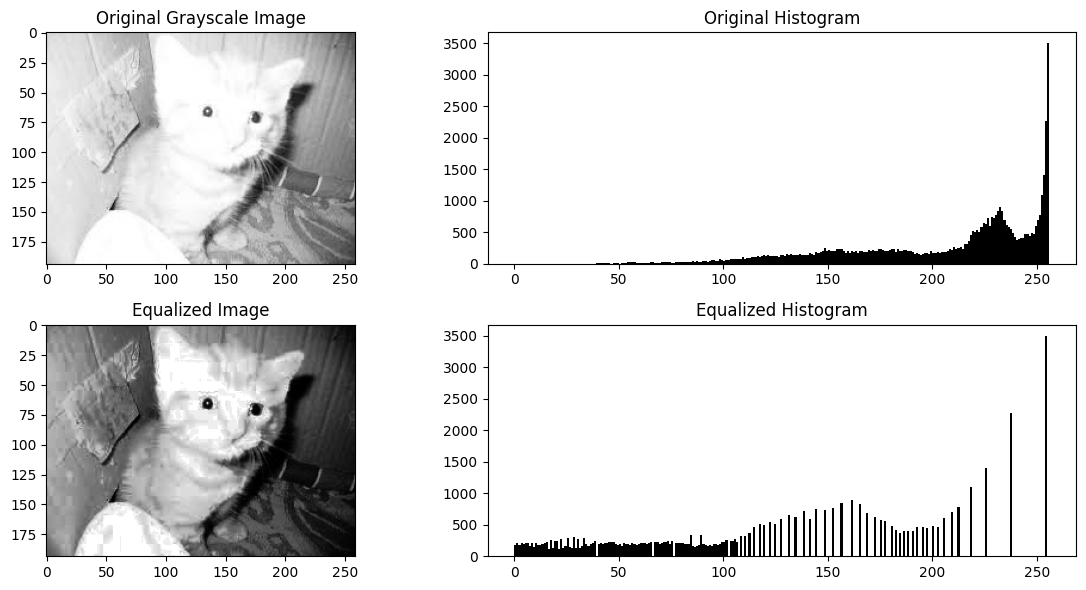

In [9]:
# Plot the original and equalized image along with their histograms
plt.figure(figsize=(12, 6))

# Original Image and its Histogram
plt.subplot(2, 2, 1)
plt.imshow(img_gray, cmap='gray')
plt.title('Original Grayscale Image')

plt.subplot(2, 2, 2)
plt.hist(img_gray.flatten(), bins=256, range=[0, 256], color='black')
plt.title('Original Histogram')

# Equalized Image and its Histogram
plt.subplot(2, 2, 3)
plt.imshow(new_img, cmap='gray')
plt.title('Equalized Image')

plt.subplot(2, 2, 4)
plt.hist(new_img.flatten(), bins=256, range=[0, 256], color='black')
plt.title('Equalized Histogram')

plt.tight_layout()
plt.show()